## Data 512
### A2: Bias in Data

#### Step 1: Select and Perform Analysis

**The goal is to identify potential sources of bias in a corpus of human-annotated data, and describe some implications of those biases.**

The corpus used iscalled the Wikipedia Talk corpus, and it consists of three datasets. Each dataset contains thousands of online discussion posts made by Wikipedia editors who were discussing how to write and edit Wikipedia articles. Crowdworkers labelled these posts for three kinds of hostile speech: “toxicity”, “aggression”, and “personal attacks”. Many posts in each dataset were labelled by multiple crowdworkers for each type of hostile speech, to improve accuracy.

For the purpose of this explatory analysis, the datasets used are:
- **Toxicity** - 160k labeled comments from English Wikipedia by approximately 10 annotators via Crowdflower on a spectrum of how toxic the comment is (perceived as likely to make people want to leave the discussion) to how healthy to conversation the contribution is.
- **Aggression** - 100k labeled comments from English Wikipedia by approximately 10 annotators via Crowdflower on how aggressive the comment was perceived to be along with some demographic data for each crowd-worker.

This data can be found on [Figshare](https://figshare.com/projects/Wikipedia_Talk/16731).
<br> <br>

**This block of code is used to import different Python libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Toxicity and Aggression

For the purpose of analyzing comments classified as toxic, exploratory data analysis is performed. Each step is described below:

**Reading the comments, annotations and the worker demographics files for Toxicity:**

In [2]:
tox_comments = pd.read_csv('data/Toxicity/toxicity_annotated_comments.tsv', sep = '\t', index_col = 0)
tox_annotations = pd.read_csv('data/Toxicity/toxicity_annotations.tsv',  sep = '\t')
tox_worker = pd.read_csv('data/Toxicity/toxicity_worker_demographics.tsv',  sep = '\t')

In [3]:
agg_comments = pd.read_csv('data/Aggression/aggression_annotated_comments.tsv', sep = '\t', index_col = 0)
agg_annotations = pd.read_csv('data/Aggression/aggression_annotations.tsv',  sep = '\t')
agg_worker = pd.read_csv('data/Aggression/aggression_worker_demographics.tsv',  sep = '\t')

**Taking a look at the total number of unique annotations:**

In [4]:
len(tox_annotations['rev_id'].unique())

159686

**Taking a look at some of these toxic comments:**

In [5]:
tox_comments.head(2)
#print(tox_comments.columns)

,comment,year,logged_in,ns,sample,split
rev_id,,,,,,
2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train


**Taking a look at some of these aggressive comments:**

In [6]:
agg_comments.head(2)

,comment,year,logged_in,ns,sample,split
rev_id,,,,,,
37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train
44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,True,article,random,train


**Taking a look at some of the toxic annotations.**

In [7]:
tox_annotations.head(5)

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


*toxicity* is an Indicator variable and takes a value of {0,1} where a value of 1 is refers to a toxic comment labelled by an annotator.

**Taking a look at some of the aggressive annotations.**

In [8]:
agg_annotations.head(5)

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


*aggression* is an Indicator variable and takes a value of {0,1} where a value of 1 is refers to an aggressive comment labelled by an annotator.

**Labelling a comment as toxic if a majority of the annotators did so:**

In [9]:
tox_labels = tox_annotations.groupby('rev_id')['toxicity'].mean() > 0.5

**Labelling a comment as aggressive if a majority of the annotators did so:**

In [10]:
agg_labels = agg_annotations.groupby('rev_id')['aggression'].mean() > 0.5

**Joining labels and comments:**

In [11]:
tox_comments['toxicity'] = tox_labels
agg_comments['aggression'] = agg_labels

**Adding options to display the entire comment to inspect some values:**

In [12]:
pd.set_option('display.max_colwidth', None)

**Taking a look at some of the comments labelled as "toxic":**

In [13]:
tox_comments.loc[tox_comments['toxicity'] == True]

,comment,year,logged_in,ns,sample,split,toxicity
rev_id,,,,,,,
597212.0,"`NEWLINE_TOKENNEWLINE_TOKENAfter the wasted bit on his sexuality, I haven't read the above diatribe but one thing for ABSOLUTE certain: Never in the history of this planet has Umberto ever been referred to as Humbert. It is this kind of lunacy that renders Wikipedia as a ``fringe`` place for idiots to play. Get serious....DW`",2003,False,article,random,test,True
1266286.0,"NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENErik, for crying out loud. You legally can have sex with children, but not with underage children. Underage children are children beneath the legal age of consent (different states have 14, 15, 16, 17 or 18 as the underage limit. Children in most countries means someone under the age of 18. In Ireland for example, a 'child' aged 17 is over the age of consent. In Britain it is 16. Do you know the first thing about the topic? NEWLINE_TOKENNEWLINE_TOKENThe name is standard english asage. Scandal is a POV term. Allegation allows the discussion of cases that have not yet come to court, which cannot for technical reasons be prosecuted and cases that were thrown up as invalid. Roman Catholic Church sex abuses allegations in standard english means allegations about the Roman Catholic Church. NEWLINE_TOKENNEWLINE_TOKENPublic relations is minor tabloid point when you are discussing the rape of children, so stop adding in an irrelevant topic. NEWLINE_TOKENNEWLINE_TOKENYour mucking around lost a lot of changes, spelling corrections and other problems solved. I was caught in an edit conflict with you and given the scale of the changes could do nothing but a cut and paste job. I then tried to go in to your version to transfer over accurate changes but then you started this insane fucking around with the article's location, using a POV title. I will keep moving back to a carefully worded neutral title.",2003,True,user,random,test,True
1502668.0,"BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, 

**Taking a look at some of the comments labelled as "aggressive":**

In [14]:
agg_comments.loc[agg_comments['aggression'] == True]

,comment,year,logged_in,ns,sample,split,aggression
rev_id,,,,,,,
694840,"`NEWLINE_TOKENNEWLINE_TOKEN:Click on my ``Annoying Users`` link! I guess Massachusetts is a republic, then? Defending facts against the lies of determined zealots seems to be a particular sticking-place for Wikipedia ( 02:58 Feb 21, 2003 (UTC)`",2003,True,user,random,train,True
801279,Iraq is not good ===NEWLINE_TOKENNEWLINE_TOKEN=== USA is bad NEWLINE_TOKENNEWLINE_TOKEN,2003,True,article,random,train,True
1450441,`NEWLINE_TOKENNEWLINE_TOKENBuddha - ``Some suggest that victims should be referred to additional resources and made aware of their rights under policy and law.``NEWLINE_TOKENNEWLINE_TOKENThat's an incredibly silly way to phrase that. `,2003,True,article,random,train,True
2702703,"NEWLINE_TOKENNEWLINE_TOKEN____NEWLINE_TOKENfuck off you little asshole. If you want to talk to me as a human start showing some fear the way humans act around other humans, because if you continue your beligerant campaign, i will cross another boundary and begin off-site recruitmehnt. NEWLINE_TOKENNEWLINE_TOKENI can escalate till I am rhetorically nuclear with the whole goddamed mob of you if that is where you think you will find what you want. NEWLINE_TOKENNEWLINE_TOKENYou had better start expressing some interest in the concerns presented to you or your credibility as either a document or a community will be about that of a pile of shit.",2004,True,user,random,train,True
4632658,"i have a dick, its bigger than yours! hahaha",2004,True,article,blocked,train,True
...,...,...,...,...,...,...,...
699646005,"Don't keep changing my page I made please. You're obviously retarted. If you know the slightest thing about Brandon Semenuk, you would know he's won Red Bull Joyride four times. Leave the page alone.",2016,True,user,blocked,train,True
699659494,im soory since when is google images not allowed (ppl take stuff from it all the time fuggin fagitNEWLINE_TOKENItalic textyou assholeNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKEN,2016,True,user,blocked,dev,True
699660419,what ever you fuggin fagNEWLINE_TOKENQuestion how did you know they were not mineNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKEN,2016,True,user,blocked,test,True


Looking at some rows of data, I can see that that there are NEWLINE_TOKEN and tab spaces on the comments.

Cleaning the comments column to remove these tokens:

In [15]:
# remove newline and tab tokens
tox_comments['comment'] = tox_comments['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
tox_comments['comment'] = tox_comments['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))

agg_comments['comment'] = agg_comments['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
agg_comments['comment'] = agg_comments['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))

**Taking a look at the data again:**

In [16]:
tox_comments.loc[tox_comments['toxicity'] == True]

,comment,year,logged_in,ns,sample,split,toxicity
rev_id,,,,,,,
597212.0,"` After the wasted bit on his sexuality, I haven't read the above diatribe but one thing for ABSOLUTE certain: Never in the history of this planet has Umberto ever been referred to as Humbert. It is this kind of lunacy that renders Wikipedia as a ``fringe`` place for idiots to play. Get serious....DW`",2003,False,article,random,test,True
1266286.0,"Erik, for crying out loud. You legally can have sex with children, but not with underage children. Underage children are children beneath the legal age of consent (different states have 14, 15, 16, 17 or 18 as the underage limit. Children in most countries means someone under the age of 18. In Ireland for example, a 'child' aged 17 is over the age of consent. In Britain it is 16. Do you know the first thing about the topic? The name is standard english asage. Scandal is a POV term. Allegation allows the discussion of cases that have not yet come to court, which cannot for technical reasons be prosecuted and cases that were thrown up as invalid. Roman Catholic Church sex abuses allegations in standard english means allegations about the Roman Catholic Church. Public relations is minor tabloid point when you are discussing the rape of children, so stop adding in an irrelevant topic. Your mucking around lost a lot of changes, spelling corrections and other problems solved. I was caught in an edit conflict with you and given the scale of the changes could do nothing but a cut and paste job. I then tried to go in to your version to transfer over accurate changes but then you started this insane fucking around with the article's location, using a POV title. I will keep moving back to a carefully worded neutral title.",2003,True,user,random,test,True
1502668.0,"BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, B

In [17]:
agg_comments.loc[agg_comments['aggression'] == True]

,comment,year,logged_in,ns,sample,split,aggression
rev_id,,,,,,,
694840,"` :Click on my ``Annoying Users`` link! I guess Massachusetts is a republic, then? Defending facts against the lies of determined zealots seems to be a particular sticking-place for Wikipedia ( 02:58 Feb 21, 2003 (UTC)`",2003,True,user,random,train,True
801279,Iraq is not good === === USA is bad,2003,True,article,random,train,True
1450441,` Buddha - ``Some suggest that victims should be referred to additional resources and made aware of their rights under policy and law.`` That's an incredibly silly way to phrase that. `,2003,True,article,random,train,True
2702703,"____ fuck off you little asshole. If you want to talk to me as a human start showing some fear the way humans act around other humans, because if you continue your beligerant campaign, i will cross another boundary and begin off-site recruitmehnt. I can escalate till I am rhetorically nuclear with the whole goddamed mob of you if that is where you think you will find what you want. You had better start expressing some interest in the concerns presented to you or your credibility as either a document or a community will be about that of a pile of shit.",2004,True,user,random,train,True
4632658,"i have a dick, its bigger than yours! hahaha",2004,True,article,blocked,train,True
...,...,...,...,...,...,...,...
699646005,"Don't keep changing my page I made please. You're obviously retarted. If you know the slightest thing about Brandon Semenuk, you would know he's won Red Bull Joyride four times. Leave the page alone.",2016,True,user,blocked,train,True
699659494,im soory since when is google images not allowed (ppl take stuff from it all the time fuggin fagit Italic textyou asshole,2016,True,user,blocked,dev,True
699660419,what ever you fuggin fag Question how did you know they were not mine,2016,True,user,blocked,test,True


In [18]:
tox_comments.head(5)

,comment,year,logged_in,ns,sample,split,toxicity
rev_id,,,,,,,
2232.0,"This: :One can make an analogy in mathematical terms by envisioning the distribution of opinions in a population as a Gaussian curve. We would then say that the consensus would be a statement that represents the range of opinions within perhaps three standard deviations of the mean opinion. sounds arbitrary and ad hoc. Does it really belong in n encyclopedia article? I don't see that it adds anything useful. The paragraph that follows seems much more useful. Are there any political theorists out there who can clarify the issues? It seems to me that this is an issue that Locke, Rousseau, de Toqueville, and others must have debated... SR",2002,True,article,random,train,False
4216.0,"` :Clarification for you (and Zundark's right, i should have checked the Wikipedia bugs page first). This is a ``bug`` in the code that makes wikipedia work it just means that there is a line of code that may have an error as small as an extra space. It's analogous (in a VERY simplified way) to trying to make something bold in HTML and forgetting to put the at the end, so you'd see something like this: words in bold Instead of this: words in bold It's not like a virus, that is code somebody deliberately wrote in order to infect your computer and damage files, so it won't ``go around.`` JHK `",2002,True,user,random,train,False
8953.0,Elected or Electoral? JHK,2002,False,article,random,test,False
26547.0,"`This is such a fun entry. Devotchka I once had a coworker from Korea and not only couldn't she tell the difference between USA-English and British English, she had trouble telling the difference between different European languages. (Kind of keeps things in perspective, eh?) -) :Not suprising. While I can easily tell the difference between French, German, Italian, Spanish, Dutch, etc., put me in a room with a Chinese, Japanese, Korean, Vietnamese and a Thai speaker and I probably couldn't tell the difference. (If I saw it written I'd probably have somewhat more luck though.) SJK Vietnamese has more syllable-final consonants than Japanese, I think you can tell them apart that way, maybe. Is this right? - Juuitchan Someone suggested: ``Heath Robinson`` and ``Rube Goldberg`` as a vocabulary difference. It's certainly an interesting parallel, but I don't think it really belongs here. They were both artists with their own style, and both are known on both sides of the pond although their use as descriptive adjectives is split as suggested. At any rate, they can't quite be considered translations, because as an adjective, ``Rube Goldberg`` is more specific, describing an overly complex mechanical device or a complex series of interdependent actions; Heath Robinson, in contrast, is more surrealistic or fantasy-oriented. LDC As an American, I would like to say that to me a bum is a homeless person as much as the butt, a flat is an apartment, and rubbish certainly is trash. Granted, I agree that a fag is not a cigarette, and underground is not a subway. I may do some actual research, and come back and fiddle with that list. - Eean. :I think Americans certainly understand the use of ``bum`` for ``butt``, ``rubbish`` for ``trash``, and (to a lesser degree) ``flat`` for ``apartment``. But we don't use those terms much. Point to a container for discarded things, and an American will say ``that's a trash can``; a Brit will say ``that's a rubbish bin``. Americans are more likely to use ``rubbish`` in the sense of ``bullshit``. LDC I deleted the following pair: ``limited (Ltd)`` and ``incorporated``, since they actually mean different things. ``Incorporated`` means a corporation; ``limited`` means a limited liability corporation (you can also have unlimited liability corporations, and no liability corporations). British (and Australian also) Ltd is roughly equivalent to American LLC. SJK I would say 'torch' was much more common than 'pocket lamp' which sounds quite old-fashioned. 'Flashlight' wou

**Taking a look at toxic annotations data:**

In [19]:
tox_annotations.head(5)

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


**Taking a look at aggression annotations data:**

In [20]:
agg_annotations.head(5)

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


**Checking for Classes:**

In [21]:
tox_comments['toxicity'].value_counts()

False    144324
True      15362
Name: toxicity, dtype: int64

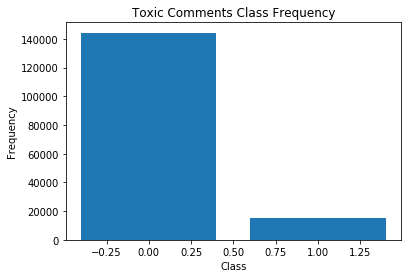

In [22]:
classes = tox_comments['toxicity'].values
#print(classes)
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Toxic Comments Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Out of a total 159686 comments, a majority of the comments were labelled as not toxic (144324), and only a very small subset was labelled as toxic.

**Checking the same in aggression data:**

In [23]:
agg_comments['aggression'].value_counts()

False    101082
True      14782
Name: aggression, dtype: int64

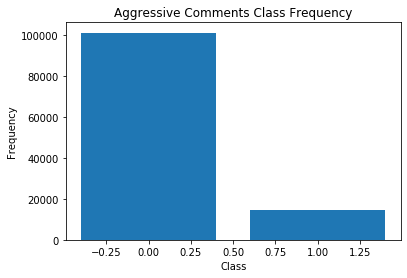

In [24]:
classes = agg_comments['aggression'].values
#print(classes)
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Aggressive Comments Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Out of a total 101082 comments, a majority of the comments were labelled as not aggressive (101082), and only a very small subset was labelled as toxic.

**Checking for missing values:**

In [25]:
tox_null_check = tox_comments['toxicity'].isnull().sum()
print('Number of unlabelled comments:',tox_null_check)

agg_null_check = agg_comments['aggression'].isnull().sum()
print('Number of unlabelled comments:',agg_null_check)

Number of unlabelled comments: 0
Number of unlabelled comments: 0


All comments have been labelled.

**Taking a look at sampling of comments - this indicates whether the comment came via random sampling of all comments, or whether it came from random sampling of the 5 comments around a blocked event:**

- For toxic comments:

In [26]:
tox_comments['sample'].value_counts()

random     80742
blocked    78944
Name: sample, dtype: int64

Sampling of comments is fairly evenly distributed.

- For aggressive comments:

**Taking a look at the split of data:**

In [27]:
agg_comments['sample'].value_counts()

blocked    78372
random     37492
Name: sample, dtype: int64

Sampling of comments is not distributed evenly.

- For toxic comments:

In [28]:
tox_comments['split'].value_counts()

train    95692
dev      32128
test     31866
Name: split, dtype: int64

- For aggressive comments:

In [29]:
agg_comments['split'].value_counts()

train    69526
test     23178
dev      23160
Name: split, dtype: int64

**Taking a look at the crowd worker's demographic data:**

- For toxic comments:

In [30]:
tox_worker.head(5)

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


- For aggressive comments:

In [31]:
agg_worker.head(5)

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


#### Exploratory Data Analysis on the Demographic Data of the crowd workers:

**1. Looking at the distribution of gender:**

In [32]:
# toxic
tox_worker['gender'].value_counts()

male      2327
female    1263
other        1
Name: gender, dtype: int64

In [33]:
# aggression
agg_worker['gender'].value_counts()

male      1349
female     840
other        1
Name: gender, dtype: int64

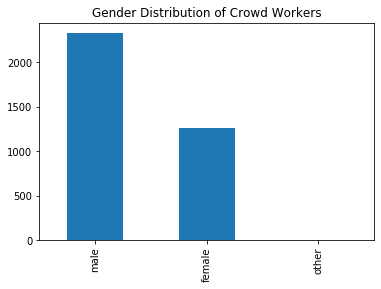

In [34]:
# toxic
tox_worker['gender'].value_counts().plot(kind='bar', title = "Gender Distribution of Crowd Workers");

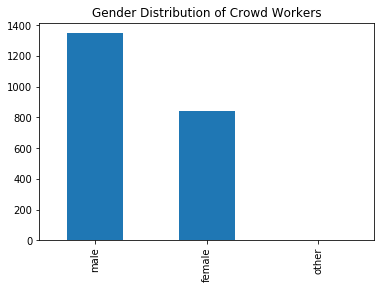

In [35]:
# aggressive
agg_worker['gender'].value_counts().plot(kind='bar', title = "Gender Distribution of Crowd Workers");

The crowd worker population contains a higher percentage of men to women. This may affect how labelers score toxicity, particularly when it comes to women. For instance, are male labelers less likely to consider a comment sexually aggressive or misogynistic?

**2. Looking at the distribution of education among the crowd workers:**

In [36]:
# toxic
tox_worker['education'].value_counts()

bachelors       1441
hs              1026
masters          546
professional     441
some              93
doctorate         41
none               3
Name: education, dtype: int64

In [37]:
# aggression
agg_worker['education'].value_counts()

bachelors       862
hs              631
masters         385
professional    243
some             48
doctorate        20
none              1
Name: education, dtype: int64

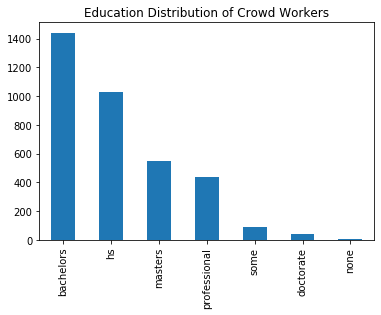

In [38]:
# toxic
tox_worker['education'].value_counts().plot(kind='bar', title = "Education Distribution of Crowd Workers");

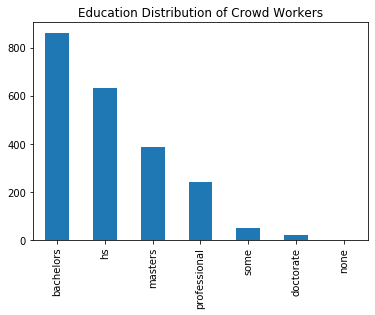

In [39]:
# aggression
agg_worker['education'].value_counts().plot(kind='bar', title = "Education Distribution of Crowd Workers");

Across education, it appears that there is at least some representation across most groups, except for those with no formal education. However, the population is a bit more skewed towards those with university degrees (bachelors, masters, and doctorate). 

**3. Looking at the distribution of English as the first language of the crowd workers:**

In [40]:
# toxic
tox_worker['english_first_language'].value_counts()

0    2925
1     666
Name: english_first_language, dtype: int64

In [41]:
# aggression
agg_worker['english_first_language'].value_counts()

0    1788
1     402
Name: english_first_language, dtype: int64

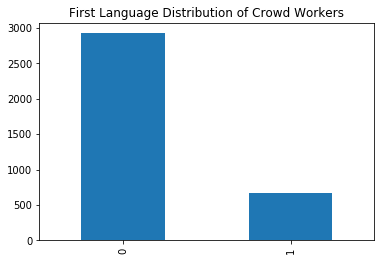

In [42]:
# toxic
tox_worker['english_first_language'].value_counts().plot(kind='bar', title = "First Language Distribution of Crowd Workers");

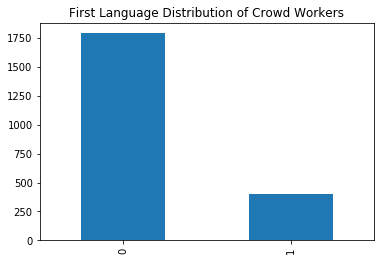

In [43]:
# aggression
agg_worker['english_first_language'].value_counts().plot(kind='bar', title = "First Language Distribution of Crowd Workers");

0 indicates that English is not a crowd worker’s first language and 1 indicates that it is their first language. As we can see, the vast majority of crowdworkers do not claim English as their first language. This may impact how the workers interpret the language of the comments they score.

**4. Looking at the distribution of age group among the crowd workers:**

In [44]:
# toxic
tox_worker['age_group'].value_counts()

18-30       1862
30-45       1247
45-60        296
Under 18      79
Over 60       30
Name: age_group, dtype: int64

In [45]:
# aggression
agg_worker['age_group'].value_counts()

18-30       1049
30-45        831
45-60        218
Under 18      37
Over 60       20
Name: age_group, dtype: int64

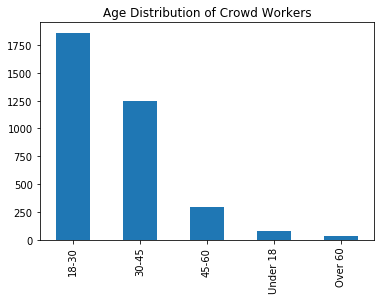

In [46]:
# toxic
tox_worker['age_group'].value_counts().plot(kind='bar', title = "Age Distribution of Crowd Workers");

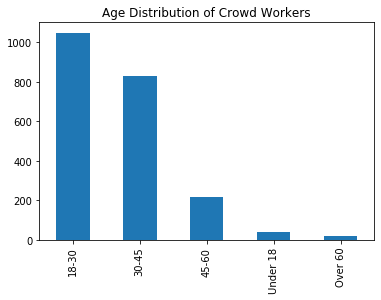

In [47]:
# aggression
agg_worker['age_group'].value_counts().plot(kind='bar', title = "Age Distribution of Crowd Workers");

The vast majority of the crowdworker population is between the ages of 18 and 45. While it makes sense to exclude most individuals under 18 (likely for legal reasons), the population is likely not representative of middle-aged and senior populations.


**Merging the datasets into a single dataframe for analysis:**

In [48]:
# toxic
tox_df = pd.merge(tox_annotations, tox_comments, how='left', on=['rev_id']) 
tox_df = pd.merge(tox_df, tox_worker, how='left', on=['worker_id']) 

# aggression
agg_df = pd.merge(agg_annotations, agg_comments, how='left', on=['rev_id']) 
agg_df = pd.merge(agg_df, agg_worker, how='left', on=['worker_id']) 

**Taking a look at the data:**

In [49]:
tox_df.head(2)

,rev_id,worker_id,toxicity_x,toxicity_score,comment,year,logged_in,ns,sample,split,toxicity_y,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,"This: :One can make an analogy in mathematical terms by envisioning the distribution of opinions in a population as a Gaussian curve. We would then say that the consensus would be a statement that represents the range of opinions within perhaps three standard deviations of the mean opinion. sounds arbitrary and ad hoc. Does it really belong in n encyclopedia article? I don't see that it adds anything useful. The paragraph that follows seems much more useful. Are there any political theorists out there who can clarify the issues? It seems to me that this is an issue that Locke, Rousseau, de Toqueville, and others must have debated... SR",2002,True,article,random,train,False,female,0.0,30-45,bachelors
1,2232.0,4000,0,0.0,"This: :One can make an analogy in mathematical terms by envisioning the distribution of opinions in a population as a Gaussian curve. We would then say that the consensus would be a statement that represents the range of opinions within perhaps three standard deviations of the mean opinion. sounds arbitrary and ad hoc. Does it really belong in n encyclopedia article? I don't see that it adds anything useful. The paragraph that follows seems much more useful. Are there any political theorists out there who can clarify the issues? It seems to me that this is an issue that Locke, Rousseau, de Toqueville, and others must have debated... SR",2002,True,article,random,train,False,male,1.0,18-30,hs


In [50]:
agg_df.head(2)

,rev_id,worker_id,aggression_x,aggression_score,comment,year,logged_in,ns,sample,split,aggression_y,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,"`- This is not ``creative``. Those are the dictionary definitions of the terms ``insurance`` and ``ensurance`` as properly applied to ``destruction``. If you don't understand that, fine, legitimate criticism, I'll write up ``three man cell`` and ``bounty hunter`` and then it will be easy to understand why ``ensured`` and ``insured`` are different - and why both differ from ``assured``. The sentence you quote is absolutely neutral. You just aren't familiar with the underlying theory of strike-back (e.g. submarines as employed in nuclear warfare) guiding the insurance, nor likely the three man cell structure that kept the IRA from being broken by the British. If that's my fault, fine, I can fix that to explain. But ther'es nothing ``personal`` or ``creative`` about it. I'm tired of arguing with you. Re: the other article, ``multi-party`` turns up plenty, and there is more use of ``mutually`` than ``mutual``. If I were to apply your standard I'd be moving ``Mutual Assured Destruction`` to ``talk`` for not appealing to a Reagan voter's biases about its effectiveness, and for dropping the ``ly``. There is a double standard in your edits. If it comes from some US history book, like ``peace movement`` or 'M.A.D.' as defined in 1950, you like it, even if the definition is totally useless in 2002 and only of historical interest. If it makes any even-obvious connection or implication from the language chosen in multiple profession-specific terms, you consider it somehow non-neutral... Gandhi thinks ``eye for an eye`` describes riots, death penalty, and war all at once, but you don't. What do you know that Gandhi doesn't? Guess what: reality is not neutral. Current use of terms is slightly more controversial. Neutrality requires negotiation, and some willingness to learn. This is your problem not mine. You may dislike the writing, fine, that can be fixed. But disregarding fundamental axioms of philosphy with names that recur in multiple phrases, or failing to make critical distinctions like 'insurance' versus 'assurance' versus 'ensurance' (which are made in one quote by an Air Force general in an in-context quote), is just a disservice to the reader. If someone comes here to research a topic like MAD, they want some context, beyond history. If this is a history book, fine, it's a history book. But that wasn't what it was claimed to be... `",2002,True,article,random,train,False,male,0.0,18-30,masters
1,37675,2408,0.0,1.0,"`- This is not ``creative``. Those are the dictionary definitions of the terms ``insurance`` and ``ensurance`` as properly applied to ``destruction``. If you don't understand that, fine, legitimate criticism, I'll write up ``three man cell`` and ``bounty hunter`` and then it will be easy to understand why ``ensured`` and ``insured`` are different - and why both differ from ``assured``. The sentence you quote is absolutely neutral. You just aren't familiar with the underlying theory of strike-back (e.g. submarines as employed in nuclear warfare) guiding the insurance, nor likely the three man cell structure that kept the IRA from being broken by the British. If that's my fault, fine, I can fix that to explain. But ther'es nothing ``personal`` or ``creative`` about it. I'm tired of arguing with you. Re: the other article, ``multi-party`` turns up plenty, and there is more use of ``mutually`` than ``mutual``. If I were to apply your standard I'd be moving ``Mutual Assured Destruction`` to ``talk`` for not appealing to a Reagan voter's biases about its effectiveness, and for dropping the ``ly``. There is a double standard in your edits. If it comes from some US history book, like ``peace movement`` or 'M.A.D.' as defined in 1950, you like it, even if the definition is totally useless in 2002 and only of historical interest. If it makes any even-obvious c

**1. Gender Analysis**

In [51]:
# Calculating number of workers based gender
# toxic
tox_gender_workers = tox_worker.groupby(['gender']).worker_id.agg('count').to_frame('workers_count').reset_index()

# aggression
agg_gender_workers = agg_worker.groupby(['gender']).worker_id.agg('count').to_frame('workers_count').reset_index()

In [52]:
tox_gender_workers

,gender,workers_count
0,female,1263
1,male,2327
2,other,1


In [53]:
agg_gender_workers

,gender,workers_count
0,female,840
1,male,1349
2,other,1


In [54]:
# Calculating number of comments reviewed based on gender
# toxic
tox_gender_comments = tox_df.groupby(['gender']).rev_id.agg('count').to_frame('comments_reviewed').reset_index()

# aggression
agg_gender_comments = agg_df.groupby(['gender']).rev_id.agg('count').to_frame('comments_reviewed').reset_index()

In [55]:
tox_gender_comments

,gender,comments_reviewed
0,female,457346
1,male,889251
2,other,358


In [56]:
agg_gender_comments

,gender,comments_reviewed
0,female,308103
1,male,547328
2,other,83


In [57]:
# Merging the two
gender_distribution_tox = pd.merge(tox_gender_comments, tox_gender_workers, how = 'outer', on=['gender'])

gender_distribution_agg = pd.merge(agg_gender_comments, agg_gender_workers, how = 'outer', on=['gender'])

In [58]:
gender_distribution_tox

,gender,comments_reviewed,workers_count
0,female,457346,1263
1,male,889251,2327
2,other,358,1


In [59]:
gender_distribution_agg

,gender,comments_reviewed,workers_count
0,female,308103,840
1,male,547328,1349
2,other,83,1


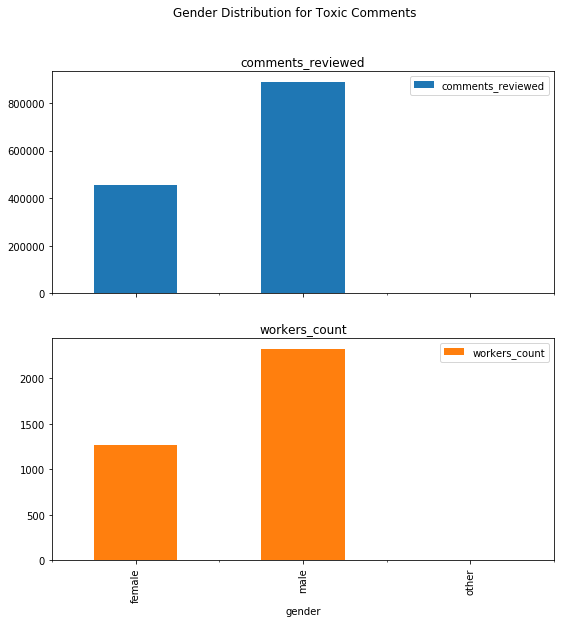

In [60]:
# Visualizing the table
gender_distribution_tox.plot(kind='bar', x = 'gender', subplots = True, figsize=(9,9), title = "Gender Distribution for Toxic Comments")
plt.show()

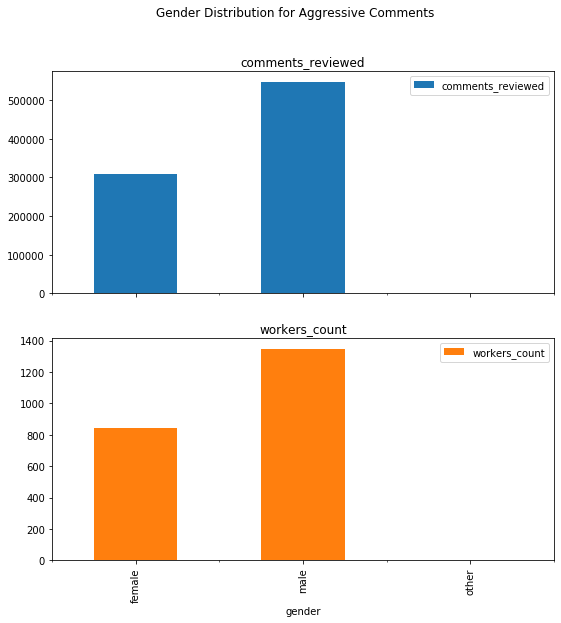

In [61]:
# Visualizing the table
gender_distribution_agg.plot(kind='bar', x = 'gender', subplots = True, figsize=(9,9), title = "Gender Distribution for Aggressive Comments")
plt.show()

**Observations:**

- The distribution of workers does not represent the overall population fairly. There are considerably more male annotators than female. Further, the "Other" category of gender (presumbly non binary gender) are not represented at all.
- Comments considered to be sexist or misogyntic might not be accurately labelled by men. This could be a form of representation bias.
- Non binary gender is not represented at all - this could contribute to a lack of perspective for the minority group.
- There is definitely a gender imbalance.

**2. Language Analysis:**

In [62]:
# Calculating number of workers based english as first language
# toxic
tox_eng_workers = tox_worker.groupby(['english_first_language']).worker_id.agg('count').to_frame('workers_count').reset_index()

# aggressive
agg_eng_workers = agg_worker.groupby(['english_first_language']).worker_id.agg('count').to_frame('workers_count').reset_index()

In [63]:
tox_eng_workers

,english_first_language,workers_count
0,0,2925
1,1,666


In [64]:
agg_eng_workers

,english_first_language,workers_count
0,0,1788
1,1,402


In [65]:
# Calculating number of comments reviewed based on english as their first language
# toxic
tox_eng_comments = tox_df.groupby(['english_first_language']).rev_id.agg('count').to_frame('comments_reviewed').reset_index()

# aggressive
agg_eng_comments = agg_df.groupby(['english_first_language']).rev_id.agg('count').to_frame('comments_reviewed').reset_index()

In [66]:
tox_eng_comments

,english_first_language,comments_reviewed
0,0.0,1113162
1,1.0,233793


In [67]:
agg_eng_comments

,english_first_language,comments_reviewed
0,0.0,741759
1,1.0,113755


In [68]:
# Merging the two
# toxic
language_distribution_tox = pd.merge(tox_eng_workers, tox_eng_comments, how = 'outer', on=['english_first_language'])

# aggressive
language_distribution_agg = pd.merge(agg_eng_workers, agg_eng_comments, how = 'outer', on=['english_first_language'])

In [69]:
language_distribution_tox

,english_first_language,workers_count,comments_reviewed
0,0,2925,1113162
1,1,666,233793


In [70]:
language_distribution_agg

,english_first_language,workers_count,comments_reviewed
0,0,1788,741759
1,1,402,113755


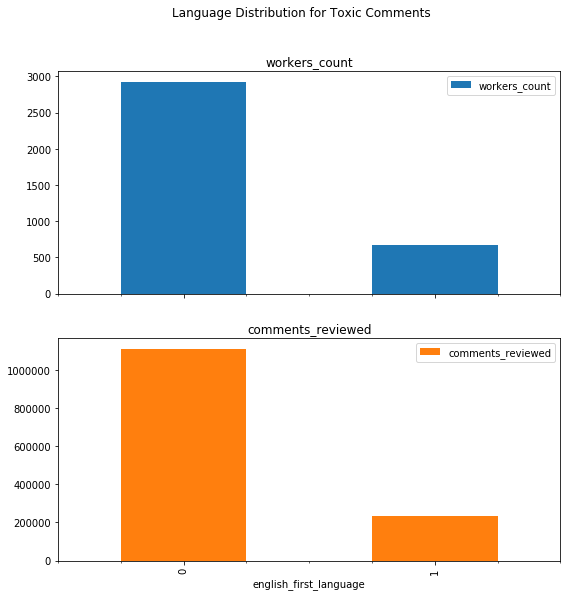

In [71]:
# Visualizing the table
language_distribution_tox.plot(kind='bar', x = 'english_first_language', subplots = True, figsize=(9,9), title = "Language Distribution for Toxic Comments")
plt.show()

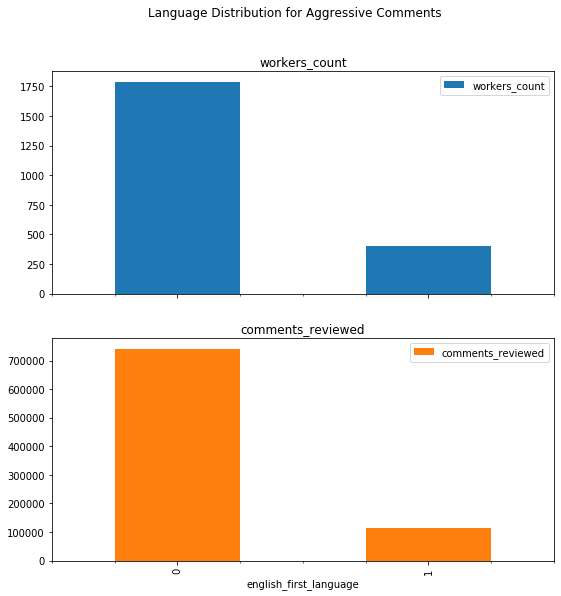

In [72]:
# Visualizing the table
language_distribution_agg.plot(kind='bar', x = 'english_first_language', subplots = True, figsize=(9,9), title = "Language Distribution for Aggressive Comments")
plt.show()

**Observations:**

- A majority of the annotators did not identify English as their first language.
- This could impact how workers interpret the comments. For example, the term 'fag' might be labelled as toxic but in a comment's context, it might refer to a cigarette. 
- There could also be normative bias: which includes biases caused by community norms which might not be obvious to a non-english speaker.

**3. Level of Education:**

In [73]:
# Calculating number of workers based their education
# toxic
tox_educ_workers = tox_worker.groupby(['education']).worker_id.agg('count').to_frame('workers_count').reset_index()

# aggression
agg_educ_workers = agg_worker.groupby(['education']).worker_id.agg('count').to_frame('workers_count').reset_index()

In [74]:
tox_educ_workers

,education,workers_count
0,bachelors,1441
1,doctorate,41
2,hs,1026
3,masters,546
4,none,3
5,professional,441
6,some,93


In [75]:
agg_educ_workers

,education,workers_count
0,bachelors,862
1,doctorate,20
2,hs,631
3,masters,385
4,none,1
5,professional,243
6,some,48


In [76]:
# Calculating number of comments reviewed based on their level of education
# toxic
tox_educ_comments = tox_df.groupby(['education']).rev_id.agg('count').to_frame('comments_reviewed').reset_index()

# aggression
agg_educ_comments = agg_df.groupby('education').rev_id.agg('count').to_frame('comments_reviewed').reset_index()

In [77]:
tox_educ_comments

,education,comments_reviewed
0,bachelors,540213
1,doctorate,14583
2,hs,381511
3,masters,205425
4,none,925
5,professional,168456
6,some,35842


In [78]:
agg_educ_comments

,education,comments_reviewed
0,bachelors,346216
1,doctorate,7613
2,hs,238279
3,masters,152240
4,none,95
5,professional,93346
6,some,17725


In [79]:
# Merging the two
# toxic
education_distribution_tox = pd.merge(tox_educ_workers, tox_educ_comments, how = 'outer', on=['education'])
                                      
# aggressive
education_distribution_agg = pd.merge(agg_educ_workers, agg_educ_comments, how = 'outer', on=['education'])

In [80]:
education_distribution_tox

,education,workers_count,comments_reviewed
0,bachelors,1441,540213
1,doctorate,41,14583
2,hs,1026,381511
3,masters,546,205425
4,none,3,925
5,professional,441,168456
6,some,93,35842


In [81]:
education_distribution_agg

,education,workers_count,comments_reviewed
0,bachelors,862,346216
1,doctorate,20,7613
2,hs,631,238279
3,masters,385,152240
4,none,1,95
5,professional,243,93346
6,some,48,17725


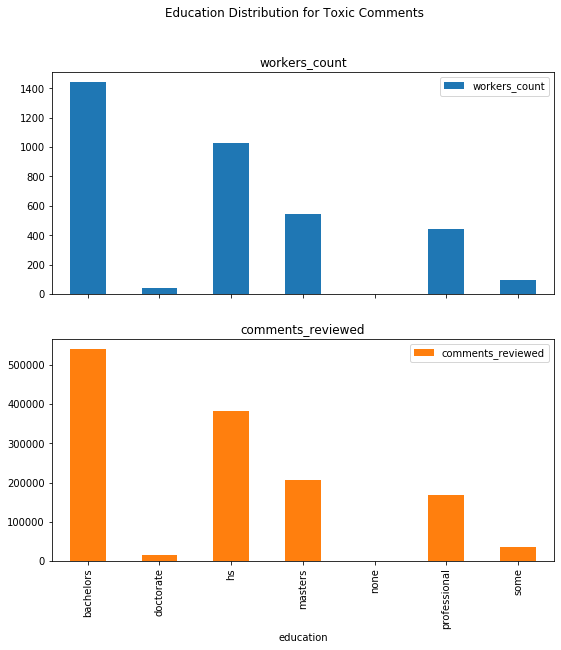

In [82]:
# Visualizing the table
education_distribution_tox.plot(kind='bar', x = 'education', subplots = True, figsize=(9,9), title = "Education Distribution for Toxic Comments")
plt.show()

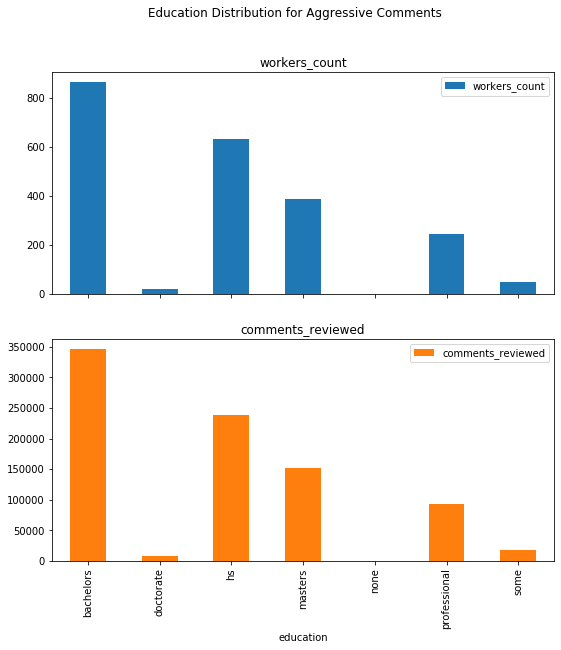

In [83]:
# Visualizing the table
education_distribution_agg.plot(kind='bar', x = 'education', subplots = True, figsize=(9,9), title = "Education Distribution for Aggressive Comments")
plt.show()

**Observations:**

- A high population of the crowd workers went to college.
- Education seems to be fairly represented.

**4. Age Group:**

In [84]:
# Calculating number of workers based their age group
# toxic
tox_age_workers = tox_worker.groupby(['age_group']).worker_id.agg('count').to_frame('workers_count').reset_index()

# aggression
agg_age_workers = agg_worker.groupby(['age_group']).worker_id.agg('count').to_frame('workers_count').reset_index()

In [85]:
tox_age_workers

,age_group,workers_count
0,18-30,1862
1,30-45,1247
2,45-60,296
3,Over 60,30
4,Under 18,79


In [86]:
agg_age_workers

,age_group,workers_count
0,18-30,1049
1,30-45,831
2,45-60,218
3,Over 60,20
4,Under 18,37


In [87]:
# Calculating number of comments reviewed based on their age group
# toxic
tox_age_comments = tox_df.groupby(['age_group']).rev_id.agg('count').to_frame('comments_reviewed').reset_index()

# aggression
agg_age_comments = agg_df.groupby(['age_group']).rev_id.agg('count').to_frame('comments_reviewed').reset_index()

In [88]:
tox_age_comments

,age_group,comments_reviewed
0,18-30,708182
1,30-45,468455
2,45-60,103127
3,Over 60,9717
4,Under 18,28160


In [89]:
# Merging the two
# toxic
age_distribution_tox = pd.merge(tox_age_workers, tox_age_comments, how = 'outer', on=['age_group'])

# aggressive
age_distribution_agg = pd.merge(agg_age_workers, agg_age_comments, how = 'outer', on=['age_group'])

In [90]:
age_distribution_tox

,age_group,workers_count,comments_reviewed
0,18-30,1862,708182
1,30-45,1247,468455
2,45-60,296,103127
3,Over 60,30,9717
4,Under 18,79,28160


In [91]:
age_distribution_agg

,age_group,workers_count,comments_reviewed
0,18-30,1049,391192
1,30-45,831,357584
2,45-60,218,77313
3,Over 60,20,7841
4,Under 18,37,9577


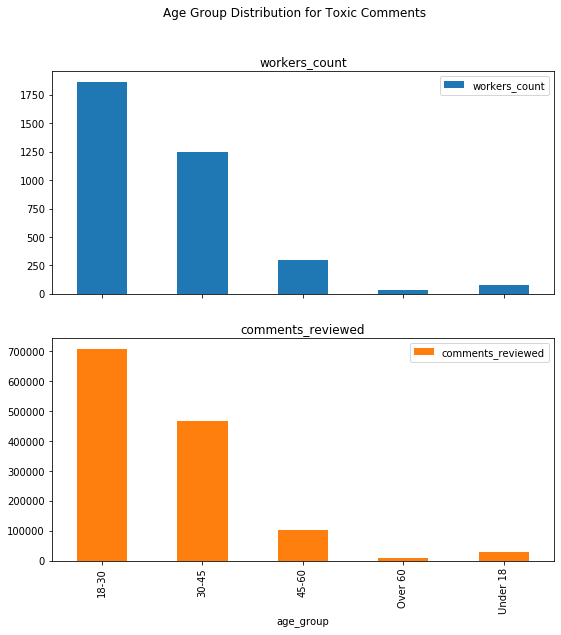

In [92]:
# Visualizing the table
age_distribution_tox.plot(kind='bar', x = 'age_group', subplots = True, figsize=(9,9), title = "Age Group Distribution for Toxic Comments")
plt.show()

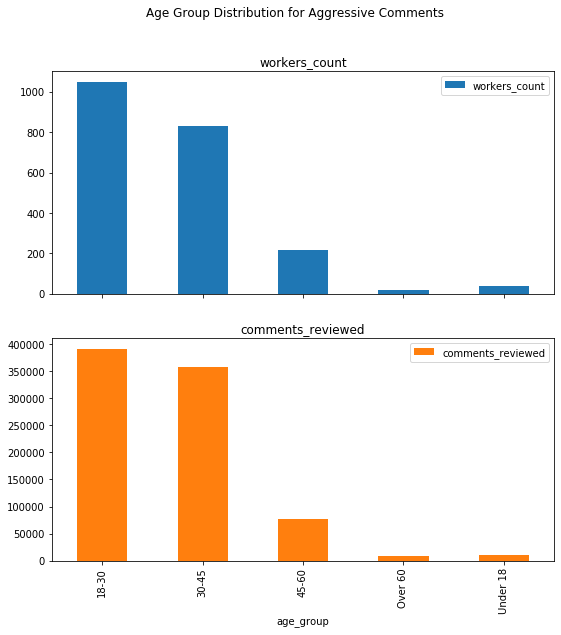

In [93]:
# Visualizing the table
age_distribution_agg.plot(kind='bar', x = 'age_group', subplots = True, figsize=(9,9), title = "Age Group Distribution for Aggressive Comments")
plt.show()

**Observations:**

- The distribution of workers by their age group does not represent the general population fairly.
- There could be potential bias introduced here, since each age group could potentially have a different level of maturity and might/might not find certain comments to be toxic.

### Questions to Answer:

Q1. Identify potential sources of bias in at least two of the three datasets

- There is definitely an imbalance in the data when it comes to gender, age group and the first language of the crowd workers. This could cause potential biases as discussed above. 
- There is also some potential self-selection bias: some "controversial" wikipedia articles (eg: on politics, etc) could have more extreme comments on them.
- There is also potential for External Bias resulting from different socioeconomic status, ideological/religious/political leaning, education, social pressure, privacy concerns, topical interests, language, personality, and culture of the crowd workers.
- There could also be some data collection bias - we don't know how the crowd worker's demographic data was categorized.

Q2. Describe how dataset bias could lead to potential unintended negative consequences of using machine learning models trained on these datasets (or the datasets themselves) in scientific research and/or data-driven software applications

> Since the demographic data of the crowd workers is highly skewed, the comments labelled as "toxic" might not be representative of the general population. This is especially problematic for women who have been historically under-represented and have been on the receiving end of such comments.

Q3. Suggest how these sources of bias could be corrected or otherwise accounted for in order to avoid these unintended consequences.

- Under-sampling or over-sampling could help correct this.
- Choosing the right machine learning model for the problem could also help alleviate the problem. For example, unsupervised models that cluster or do dimensionality reduction can learn bias from their dataset.
- Could introduce weights for groups with insufficient data (for example with Female/Other gender) to increase its importance in training. - but this could also lead to unexpected biases!

#### Step 2: Discuss further implications

Q1. Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?

- As the performance of a model is largely determined by the context, this dataset would perform best when context is related to identifying the toxicity or aggression in the speech.
- Filtering out toxic comments from any blog/social media - The model based on this dataset can do a great job at separating and hence filtering our toxic or aggressive comments on the internet. For instance, one can design a model to filter out toxic comments from one’s youtube channel.

Q2. Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?

- When language is not English -  The dataset is based on English language, hence any model trained on this data cannot be applied to other languages. This is a very big limitation as only less than 5% of the world population has English as their native language.
- Identifying sexist/misogynistic comments made against women.
- Identifying the sentiment of the user - As the dataset is customised to identify aggression, the model based on this data may not perform very well in identifying the sentiment of a comment, i.e whether the comment is in favour or against the premises.
- Identifying virality and controversial nature - Many of the NLP models used in media are focussed on identifying the topics which are controversial or have the potential to become viral. This dataset does not have enough depth to support these use cases. 

Q3. What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 

- Speeches/comments that are posted in a non-English language would be hard for Perspective API to accurately detect. This could be because the current NLP model works well only with English language.
- Sarcasm/jokes/puns might not be detected either since they might be taken literally and out of context.

Q4. What are some potential unintended, negative consequences of using the Perspective API for any of these purposes? In your opinion, are these consequences likely or serious enough that you would recommend that the Perspective API not be used in these applications? Why or why not?

- Wikipedia users and editors are likely to have some common characteristics. For example, all of these editors have access to Wikipedia and can read English. These common characteristics will generate bias in this dataset. This inherent bias would be carried forward in the models even if the models are not related to Wikipedia.
- The model if used in public domain may respond inappropriately to new test data, leading to negative consequences for the company.
